## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [9]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

In [10]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [11]:
study_results = pd.read_csv(study_results_path)

In [12]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [13]:
# Combine the data into a single dataset

merged_metadata_studyResult_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_metadata_studyResult_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice.
number_Mice = len(mouse_metadata['Mouse ID'].unique())
number_Mice

249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


DuplicatedMice=study_results[study_results.duplicated("Mouse ID")]
DuplicatedMice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
250,a275,5,46.795257,0
251,w575,5,48.913860,1
252,x822,5,45.671104,1
253,l509,5,45.851193,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_metadata_studyResult_df[merged_metadata_studyResult_df.duplicated('Mouse ID')]

#mouse_metadata[mouse_metadata.duplicated('Mouse ID')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDataFrame = pd.DataFrame(merged_metadata_studyResult_df.drop_duplicates('Mouse ID'))
cleanDataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [18]:
# Checking the number of mice in the clean DataFrame.
MouseCleen_Number = len(cleanDataFrame["Mouse ID"].unique())
MouseCleen_Number


249

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Regimen_mean= cleanDataFrame.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Regimen_median= cleanDataFrame.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Regimen_variance= cleanDataFrame.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Regimen_stdv= cleanDataFrame.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

Regimen_sem= cleanDataFrame.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summarystatisticsdataframe = pd.DataFrame({"Mean": Regimen_mean, "Median": Regimen_median, "Variance": Regimen_variance, "Standard Deviation": Regimen_stdv,"SEM": Regimen_sem})

summarystatisticsdataframe





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleanDataFrame.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Ceftamin,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Infubinol,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Ketapril,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Naftisol,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Placebo,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Propriva,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Ramicane,25.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0
Stelasyn,24.0,45.0,0.0,45.0,45.0,45.0,45.0,45.0


## Bar and Pie Charts

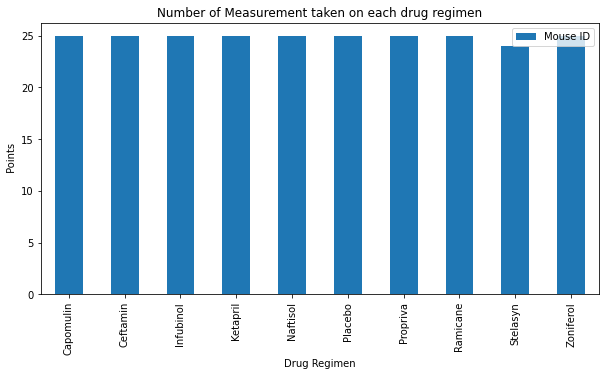

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
merged_clean_df= cleanDataFrame[["Drug Regimen", "Mouse ID"]].groupby("Drug Regimen")
number_mouse = pd.DataFrame(merged_clean_df["Mouse ID"].count())

# Use DataFrame.plot() in order to create a bar chart of the data
number_mouse.plot(kind="bar", figsize=(10,5))

#Set a title for the chart
plt.title("Number of Measurement taken on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel(" Points")


#Display chart
plt.show()
plt.tight_layout()


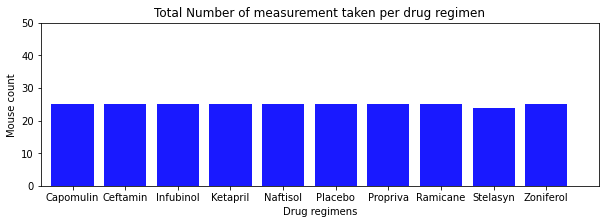

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = number_mouse.index.tolist()

mouse_count = number_mouse["Mouse ID"].tolist()

x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(10,3))
plt.bar(x_axis, mouse_count, color="blue", alpha=0.9, align="center")
plt.xticks(tick_locations, drug_regimen)

plt.title("Total Number of measurement taken per drug regimen")
plt.xlabel("Drug regimens")
plt.ylabel("Mouse count")

# Set the limits of the x axis
plt.xlim(-.60, 10)
# Set the limits of the y axis
plt.ylim(0, 50)
plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pandas



In [76]:
groupBygender = mouse_metadata[["Mouse ID","Sex"]].groupby("Sex")
gender_count = gender["Mouse ID"].count()
gender_count


Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

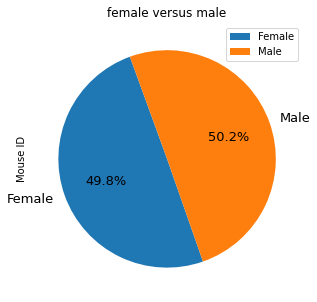

In [79]:
explode=[0,0]
gender_count.plot(kind="pie", title=("female versus male"),explode=explode,legend=True,autopct='%1.1f%%',startangle=110, shadow=False, fontsize=13, figsize=(5,5))

plt.show()

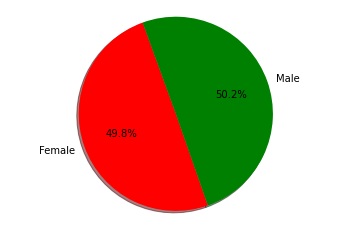

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = mouse_metadata.groupby("Sex")["Mouse ID"].count().tolist()
labels = ["Female", "Male"]
colors = ["r", "g"]
explode = (0, 0)

plt.pie(gender_count ,explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=110)

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_df = study_results.groupby("Mouse ID")
max_timepoint = grouped_df['Timepoint'].max().reset_index()
max_timepoint_df = max_timepoint.rename(columns={"Timepoint":"Timepoint Max"})
max_timepoint_df

,Mouse ID,Timepoint Max
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [68]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max = pd.merge(cleanDataFrame, max_timepoint_df,on="Mouse ID", how="left")
merged_max

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
0,k403,Ramicane,Male,21,16,0,45.0,0,45
1,s185,Capomulin,Female,3,17,0,45.0,0,45
2,x401,Capomulin,Female,16,15,0,45.0,0,45
3,m601,Capomulin,Male,22,17,0,45.0,0,45
4,g791,Ramicane,Male,11,16,0,45.0,0,45
...,...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0,5
245,z435,Propriva,Female,12,26,0,45.0,0,10
246,z581,Infubinol,Female,24,25,0,45.0,0,45
247,z795,Naftisol,Female,13,29,0,45.0,0,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Ceftamin', 'Ramicane','Infubinol','Capomulin']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
